In [1]:
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv('../processed_data/btc_future_crix.csv')
data.head()
from statsmodels.distributions.empirical_distribution import ECDF

ecdf_brr = ECDF(data.return_brr)
ecdf_btc = ECDF(data.return_btc)

u = ecdf_brr(data.return_brr)
v = ecdf_btc(data.return_btc)

In [2]:
from copulae import *

In [3]:
# Gaussian, t_Copula, Clayton, Frank
C1 = Gaussian(rho=0.1,       Law_RS=stats.norm, Law_RF=stats.norm)
C2 = t_Copula(rho=0.1, nu=4, Law_RS=stats.norm, Law_RF=stats.norm)
C3 = Clayton( theta=0.1,     Law_RS=stats.norm, Law_RF=stats.norm)
C4 = Frank(   theta=0.1,     Law_RS=stats.norm, Law_RF=stats.norm)
Copulae = [C1,C2,C3,C4]

In [5]:
C1.canonical_calibrate(u,v)
print("Gaussian done")

C2.canonical_calibrate(u,v)
print("t done")

C3.canonical_calibrate(u,v)
print("Clayton done")

C4.canonical_calibrate(u,v)
print("Frank done")

/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae.py:77: RuntimeWarning: invalid value encountered in true_divide
  return np.nanmean(np.log(part1/part2))
/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae.py:77: RuntimeWarning: invalid value encountered in true_divide
  return np.nanmean(np.log(part1/part2))


Gaussian done


/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae.py:157: RuntimeWarning: invalid value encountered in true_divide
  return np.nanmean(np.log(part1/part2))


Optimization terminated successfully.
         Current function value: -0.515526
         Iterations: 113
         Function evaluations: 239
t done
Optimization terminated successfully.
         Current function value: -0.394737
         Iterations: 39
         Function evaluations: 84
Clayton done
Optimization terminated successfully.
         Current function value: -0.413272
         Iterations: 37
         Function evaluations: 83
Frank done


In [53]:
# parameters
print("Parameters:"   ,
      "\nGaussian :" , C1.rho[0],
      "\nt        :" , C2.rho, C2.nu, 
      "\nClayton  :" , C3.theta,
      "\nFrank    :" , C4.theta)

Parameters: 
Gaussian : 0.768213750253872 
t        : 0.7751908699912305 1.9809984071442568 
Clayton  : 1.9376202821731567 
Frank    : 7.1803940534591675


In [54]:
# Likelihood
print("Log Likelihood:",
      "\nGaussian :"  , C1.l_fn(C1.rho, u,v),
      "\nt        :", C2.l_fn(C2.nu, C2.rho, u,v),
      "\nClayton  :", C3.l_fn(C3.theta, u,v),
      "\nFrank    :", C4.l_fn(C4.theta, u,v))

Log Likelihood: 
Gaussian : 0.43660580748397637 
t        : 0.5155256575318777 
Clayton  : 0.394736967662423 
Frank    : 0.4132724880518257


/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae.py:77: RuntimeWarning: invalid value encountered in true_divide
  return np.nanmean(np.log(part1/part2))


In [41]:
# Take the worse 1% of brr return as target
# target = np.quantile(data.return_brr, 0.01)
target = -3

In [47]:
h_arr = np.linspace(.8,1.2,4)
results = np.ones((4, len(h_arr)))

for i in range(len(h_arr)):
    results[0, i] = C1.F_RH(h=h_arr[i], r_h=target)
    results[1, i] = C2.F_RH(h=h_arr[i], r_h=target)
    results[2, i] = C3.F_RH(h=h_arr[i], r_h=target)
    results[3, i] = C4.F_RH(h=h_arr[i], r_h=target)
    print(i, 'is done')

/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae.py:111: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(integrand, -np.infty, self.t2.ppf(self.g(w, h, r_h)))[0] * part2


0 is done
1 is done
2 is done
3 is done


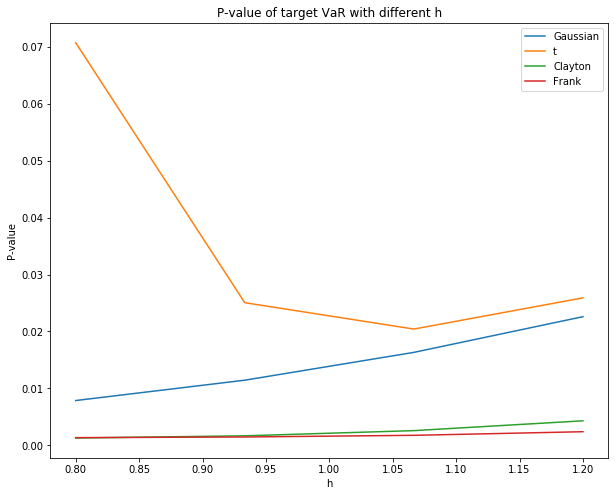

In [52]:
plt.figure(figsize=(10,8))
plt.title("P-value of target VaR with different h")
plt.plot(h_arr, results[0,:], label="Gaussian")
plt.plot(h_arr, results[1,:], label="t")
plt.plot(h_arr, results[2,:], label='Clayton')
plt.plot(h_arr, results[3,:], label='Frank')
plt.ylabel("P-value")
plt.xlabel("h")
plt.legend()